# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 95%|█████████████████████████████▍ | 212896/224548 [00:15<00:01, 10635.69it/s]

pls   -0.00459
dtype: float64
--------------------------------------
            start_date ord_types               close_type      pls
13 2021-01-08 07:50:26     short                all_close  0.00204
14 2021-01-08 08:11:44     short                all_close -0.00509
15 2021-01-08 09:52:59      long                all_close  0.00307
16 2021-01-08 11:11:02      long                all_close  0.00202
17 2021-01-08 13:44:03      long  simple_slema_move_close  0.00004
18 2021-01-08 14:03:01      long  simple_slema_move_close  0.00001
19 2021-01-08 14:24:08      long                all_close -0.00523
20 2021-01-08 14:44:43     short                all_close  0.00318
21 2021-01-08 14:53:17     short                all_close  0.00206
22 2021-01-08 15:27:40     short              force_close -0.00158
23 2021-01-08 15:56:40      long              force_close -0.00049
24 2021-01-08 16:04:32      long              force_close -0.00202
25 2021-01-08 16:19:36      long                all_close -0

100%|███████████████████████████████| 224548/224548 [00:16<00:00, 13809.41it/s]

Wall time: 42.6 s


In [3]:
data['temp_df']['open_order'] = data['open_order_temp_list']
data['temp_df']['pl'] = data['pl_temp_list'] 
data['temp_df'].to_csv('data/temp.csv')

In [4]:
min(data['temp_df']['pl'])

-0.00409

In [5]:
max(data['temp_df']['pl'])

0.0025

In [6]:
max(data['temp_df']['open_order'])

3

In [7]:
data['dt_val']

datetime.datetime(2021, 1, 8, 21, 59, 56)

In [8]:
data['orders_list']

{'total_pl': -0.00263,
 'pl_list': [-0.00263, 0.0],
 1: {'open_order_type': 'short', 'bid': 1.21971, 'pl': -0.00263},
 2: {'open_order_type': 'long', 'ask': 1.22174, 'pl': 0.0}}

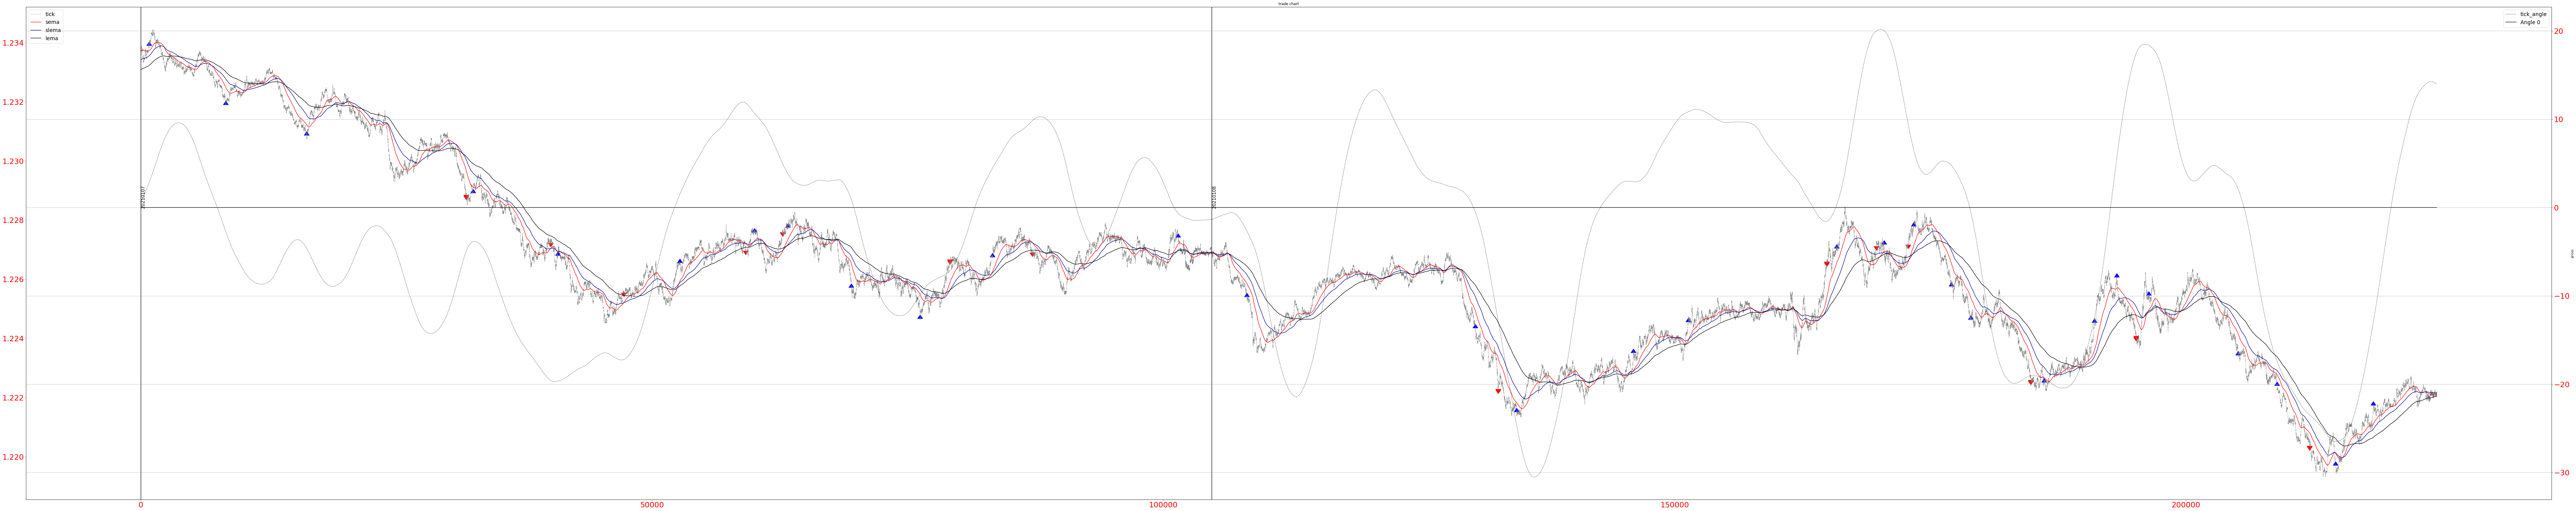

-----------------------------------------------------
Total PL : -0.00459
-------------
net_pl            : -0.00459/0.06295
-------------
+ve               : num= 17    sum= +0.02918    avg= +0.00172
-ve               : num= 11    sum= -0.03377    avg= -0.00307
-----------------------------------------------------
month_val
1   -0.00459
Name: pls, dtype: float64
-----------------------------------------------------
all_close                  15
simple_slema_move_close     7
force_close                 6
Name: close_type, dtype: int64
-----------------------------------------------------


In [9]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

In [10]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
7   -0.00058
8   -0.00401
Name: pls, dtype: float64

In [11]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete : {data["df_name"]}')

In [12]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  15
force_close                 6
simple_slema_move_close     7
Name: pls, dtype: int64

In [13]:
data['report_df'].groupby(['close_type'])['pls'].mean()

close_type
all_close                  0.000003
force_close               -0.001358
simple_slema_move_close    0.000503
Name: pls, dtype: float64

In [14]:
data['report_df'].groupby(['close_type'])['pls'].sum()

close_type
all_close                  0.00004
force_close               -0.00815
simple_slema_move_close    0.00352
Name: pls, dtype: float64

In [15]:
data['report_df'].groupby(['close_type'])['pls'].count()

close_type
all_close                  15
force_close                 6
simple_slema_move_close     7
Name: pls, dtype: int64

In [16]:
x = np.round(data['report_df'].groupby(['month_val', 'date_val'])['pls'].sum().values.mean(),4)
print(f'Average pips per day : {x}')

Average pips per day : -0.0023


In [17]:
x = data['report_df'].groupby(['month_val', 'date_val'])['pls'].count().values.mean()
print(f'Average orders per day : {x}')

Average orders per day : 14.0


In [18]:
data['report_df'].groupby(['date'])['date'].count().value_counts().sort_values(ascending=False)

1    7
3    7
Name: date, dtype: int64

In [19]:
data['report_df']['duration'].sort_values(ascending=False)

11   0 days 10:21:45
0    0 days 08:48:12
12   0 days 06:57:24
1    0 days 06:37:02
14   0 days 05:29:14
15   0 days 03:47:59
2    0 days 02:50:52
16   0 days 02:29:56
25   0 days 02:16:34
7    0 days 01:29:35
5    0 days 01:13:23
26   0 days 01:07:28
3    0 days 01:00:11
19   0 days 00:57:37
4    0 days 00:55:59
8    0 days 00:54:18
22   0 days 00:47:22
10   0 days 00:43:45
20   0 days 00:37:02
27   0 days 00:32:14
21   0 days 00:28:28
6    0 days 00:21:59
9    0 days 00:18:59
23   0 days 00:18:22
18   0 days 00:16:35
17   0 days 00:15:23
13   0 days 00:13:59
24   0 days 00:10:30
Name: duration, dtype: timedelta64[ns]